### Analyzing Frequency Distributions


1. **Copy the following numerical columns**
   - `age`
   - `number_vmail_messages`
   - `total_day_minutes`
   - `total_day_calls`
   - `total_day_charge`
   - `number_service_calls`

2. **For each column, create a histogram:**
   - Add the appropriate title, axes labels, and legend (if any) to your charts.
   - Maximize the data-ink ratio of your charts by removing any chartjunk.

3. **For each chart, add a Text Box that briefly describes the chart.**
   - For example, for `age`, you can specify the data’s distribution as well as the range within which the majority of the values lie.



In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import hvplot.pandas 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import the telcom churn csv data
telcom_data_df = pd.read_excel(Path('../resources/telcom_customer_data.xlsx'))

In [4]:
# Modify the area_code column by removing the "area_code_" part of the string from every entry.
telcom_data_df['area_code'] = telcom_data_df['area_code'].str.replace('area_code_', '')
# Modify the churn column by replacing the "yes" with a 1 and "no" with a 0.
telcom_data_df['churn'] = telcom_data_df['churn'].replace({'yes': 1, 'no': 0})

C:\Users\lerch\AppData\Local\Temp\ipykernel_222292\552923370.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telcom_data_df['churn'] = telcom_data_df['churn'].replace({'yes': 1, 'no': 0})


In [5]:
def pie_label(pct, x):
    value = round(pct / 100.*np.sum(x))
    return '{:d}\n({:.0f}%)'.format(value, pct)

In [6]:
def save_division(numerator, denumerator):
    if numerator == 0  and denumerator == 0:
        return 0
    elif denumerator == 0:
        raise ValueError("Division by zero is not allowed") 
    else:
        return numerator/denumerator

In [7]:
def stacking_bar_label(data):
    for idx in data.index:
        start = 0
        for col in data.columns:
            y = data.loc[idx, col]
            value = data.loc[idx, col]
            total = data.loc[idx, :].sum()
            ax.text(
                x=idx,
                y=(start + y / 2) * 0.95,
                s=f'{round(100 * value / total)}%',
                fontsize=15,
                ha='right',
                color='black',
                weight='bold'
                )
            start += y

In [8]:
def stacking_bar_label(data):
    for idx in data.index:
        start = 0
        for col in data.columns:
            y = data.loc[idx, col]
            value = data.loc[idx, col]
            total = data.loc[idx, :].sum()
            ax.text(
                x=idx,
                y=(start + y / 2) * 0.95,
                s=f'{round(100 * value / total)}%',
                fontsize=15,
                ha='right',
                color='black',
                weight='bold'
                )
            start += y

In [9]:
class extract_data():
    def __init__(self, chart, interval):
        self.chart = chart
        self.bin_edges = self.chart.patches
        self.interval = interval
        self.x_data = [(bin_edge.get_x() + bin_edge.get_width()/2) for bin_edge in self.bin_edges]
        self.y_data = [bin_edge.get_height() for bin_edge in self.bin_edges]
        self.x_interval = np.array(self.x_data[:interval])
        self.y_churn = np.array(self.y_data[:interval])
        self.y_total = np.array(self.y_data[:interval]) + np.array(self.y_data[interval:])
    
    def hist_label(self):
        for c, d, e in zip(self.x_interval, self.y_churn, self.y_total):
            self.chart.text(
                x=c
                , y=d
                , s=f'{round(100* save_division(d, e))}%'
                , fontsize=12
                , ha='left'
                , va='center'
                , color='darkred'
                , weight='bold'
            )

    def line_label(self):
        for x, y in zip(self.x_interval, self.y_total):
            self.chart.text(
                x=x
                , y=y
                , s='{:.0f}'.format(y)
                , fontsize=12
                , ha='right'
                , va='baseline'
                , color='black'
                , weight='bold'
            )

In [10]:
color_list = [
        'lightcoral'
        ,'lightseagreen'
        , 'springgreen'
        , 'deepskyblue'
        , 'gray'
        , 'violet'
        , 'brown'
        , 'lightcoral'
        , 'deeppink'
        , 'peru'
        , 'purple'
        , 'cyan'
        , 'forestgreen'
        , 'crimson'
        , 'magenta'
        ]

In [11]:
telcom_data_df['age'].hvplot(kind='hist', bins=20, title='Age Distribution')

:Histogram   [age]   (Count)

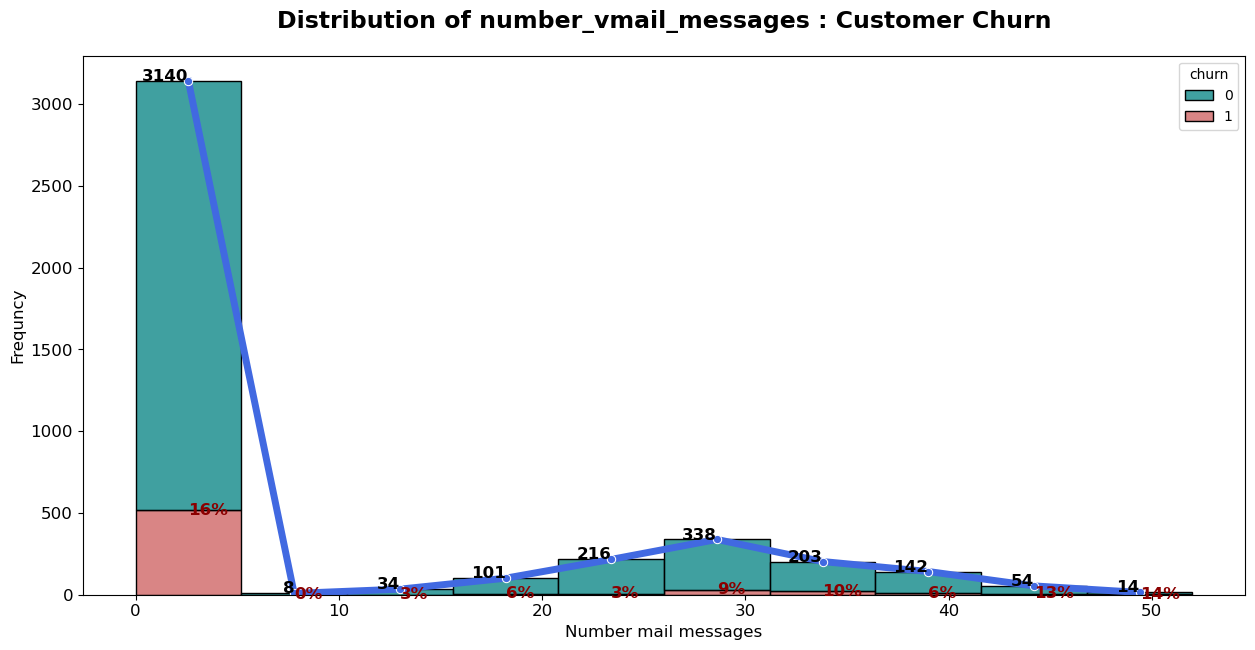

In [12]:
n = 10
target_variable = ['number_vmail_messages', 'churn']

fig, ax1 = plt.subplots(figsize=(15,7))
sns.histplot(data=telcom_data_df, x=target_variable[0], bins=n, stat='count', hue=target_variable[1], multiple='stack', palette=['teal', 'indianred'], ax=ax1)
plot = extract_data(ax1, n)
plot.hist_label()
plot.line_label()
sns.lineplot(x=plot.x_interval, y=plot.y_total, marker='o', sort=False, color='royalblue', estimator=None, linewidth=5, ax=ax1)

ax1.set_title('Distribution of {} : Customer Churn'.format(target_variable[0]), fontweight='bold', pad=20, fontsize=17)
ax1.tick_params(labelsize=12)
ax1.set_xlabel('Number mail messages', fontsize=12)
ax1.set_ylabel('Frequncy', fontsize=12)
ax1.tick_params(labelsize=12)
plt.show()

In [13]:
telcom_data_df['total_day_minutes'].hvplot(kind='hist', bins=20, title='Total minutes (day)')

:Histogram   [total_day_minutes]   (Count)

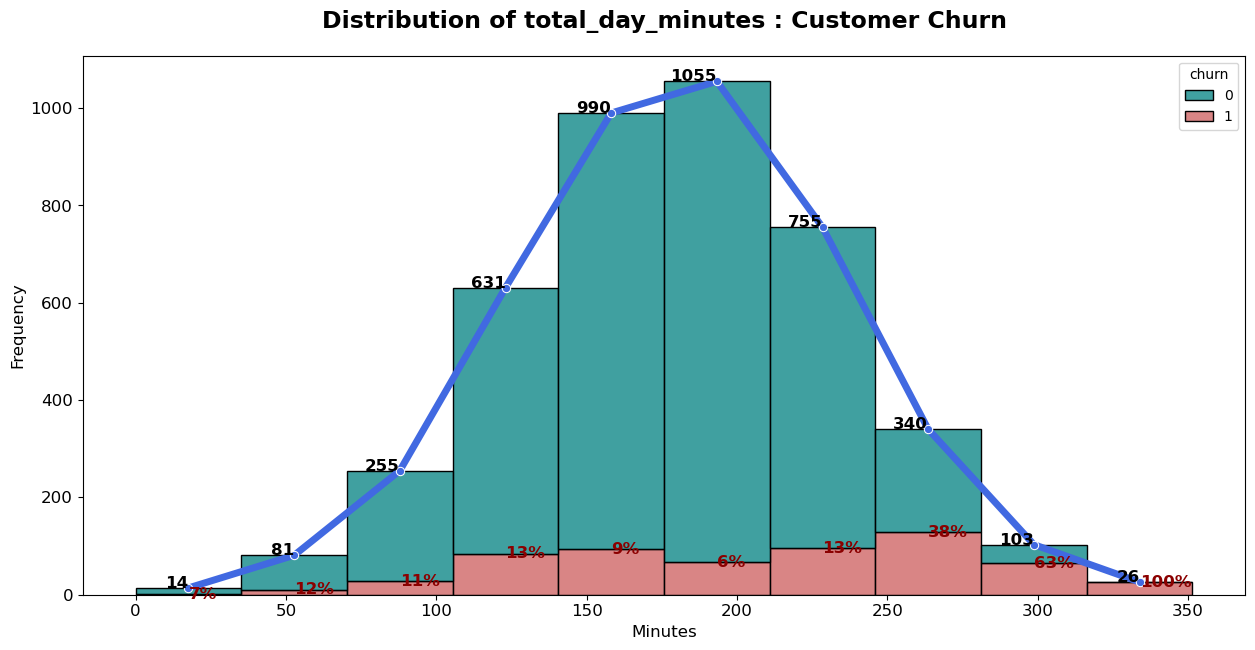

In [14]:
n = 10
target_variable = ['total_day_minutes', 'churn']

fig, ax1 = plt.subplots(figsize=(15,7))
sns.histplot(data=telcom_data_df, x=target_variable[0], bins=n, stat='count', hue=target_variable[1], multiple='stack', palette=['teal', 'indianred'], ax=ax1)
plot = extract_data(ax1, n)
plot.hist_label()
plot.line_label()
sns.lineplot(x=plot.x_interval, y=plot.y_total, marker='o', sort=False, color='royalblue', estimator=None, linewidth=5, ax=ax1)

ax1.set_title('Distribution of {} : Customer Churn'.format(target_variable[0]), fontweight='bold', pad=20, fontsize=17)
ax1.tick_params(labelsize=12)
ax1.set_xlabel('Minutes', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.tick_params(labelsize=12)

plt.show()

In [15]:
telcom_data_df['total_day_calls'].hvplot(kind='hist', bins=20, title='Total Day Calls')

:Histogram   [total_day_calls]   (Count)

In [16]:
telcom_data_df['total_day_charge'].hvplot(kind='hist', bins=20, title='Total Day Charge')

:Histogram   [total_day_charge]   (Count)

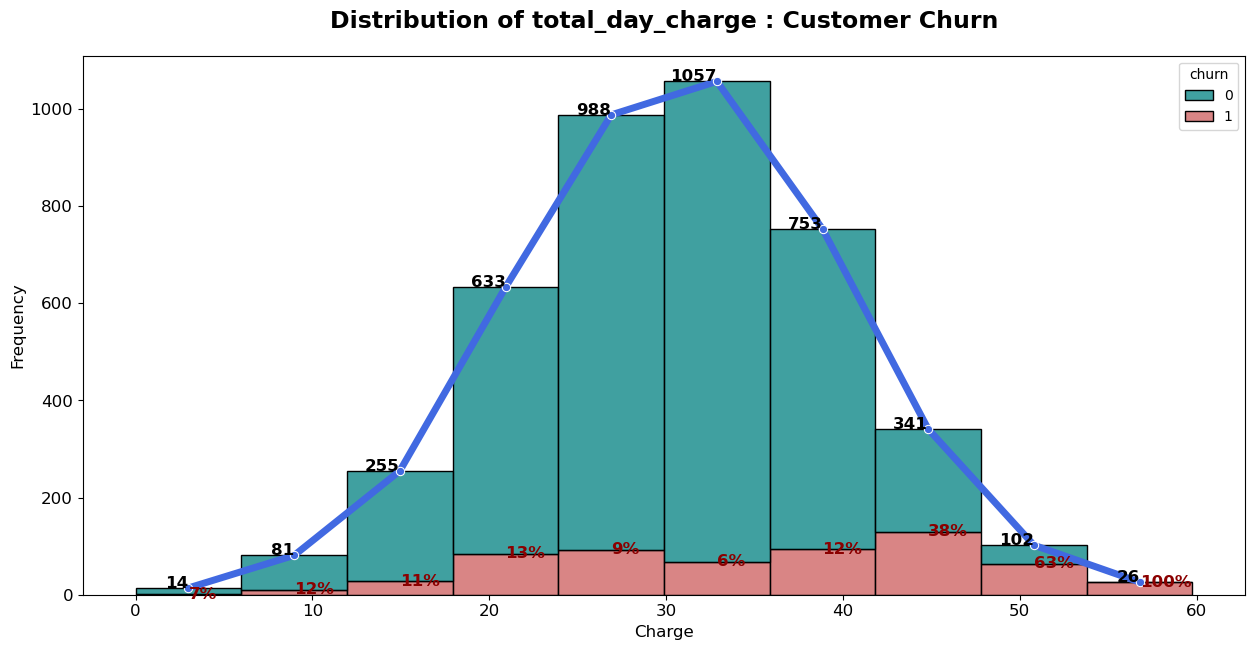

In [17]:
n = 10
target_variable = ['total_day_charge', 'churn']

fig, ax1 = plt.subplots(figsize=(15,7))
sns.histplot(data=telcom_data_df, x=target_variable[0], bins=n, stat='count', hue=target_variable[1], multiple='stack', palette=['teal', 'indianred'], ax=ax1)
plot = extract_data(ax1, n)
plot.hist_label()
plot.line_label()
sns.lineplot(x=plot.x_interval, y=plot.y_total, marker='o', sort=False, color='royalblue', estimator=None, linewidth=5, ax=ax1)

ax1.set_title('Distribution of {} : Customer Churn'.format(target_variable[0]), fontweight='bold', pad=20, fontsize=17)
ax1.tick_params(labelsize=12)
ax1.set_xlabel('Charge', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.tick_params(labelsize=12)
plt.show()

In [18]:
telcom_data_df['number_customer_service_calls'].hvplot(kind='hist', bins=20, title='Number of Customer Service Calls')

:Histogram   [number_customer_service_calls]   (Count)

NameError: name 'df' is not defined

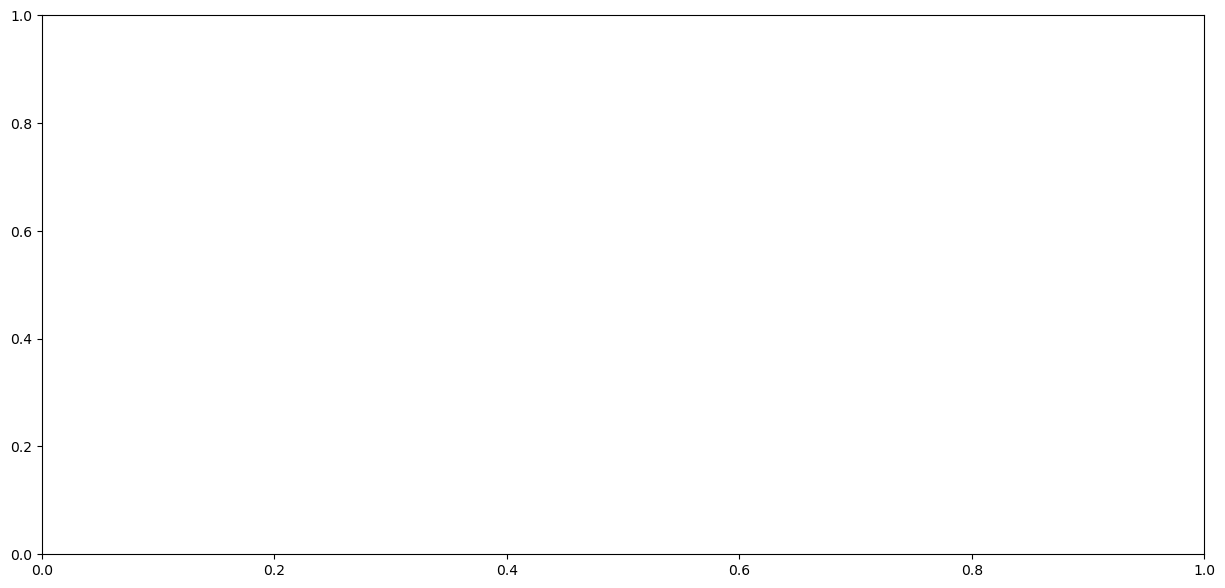

In [19]:
n = 10
target_variable = ['number_customer_service_calls', 'churn']

fig, ax1 = plt.subplots(figsize=(15,7))
sns.histplot(data=df, x=target_variable[0], bins=n, stat='count', hue=target_variable[1], multiple='stack', palette=['teal', 'indianred'], ax=ax1)
plot = extract_data(ax1, n)
plot.hist_label()
plot.line_label()
sns.lineplot(x=plot.x_interval, y=plot.y_total, marker='o', sort=False, color='royalblue', estimator=None, linewidth=5, ax=ax1)

ax1.set_title('Distribution of {} : Customer Churn'.format(target_variable[0]), fontweight='bold', pad=20, fontsize=17)
ax1.tick_params(labelsize=12)
ax1.set_xlabel('Number customer service calls', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.tick_params(labelsize=12)
plt.show()

In [22]:
# create the pivot table
telcom_data_pivot = pd.pivot_table(telcom_data_df, 
                                   values='age', 
                                   index='churn', 
                                   columns='state', 
                                   aggfunc='mean')

filtered_pivot_table = telcom_data_pivot[['NJ', 'MN', 'TX']]

filtered_pivot_table

state,NJ,MN,TX
churn,,,
0,39.228571,40.359551,40.177215
1,31.423077,31.000000,28.947368


In [24]:
filtered_pivot_table.hvplot(kind='hist', bins=20, title= 'Average age')

:NdOverlay   [state]
   :Histogram   [TX]   (Count)

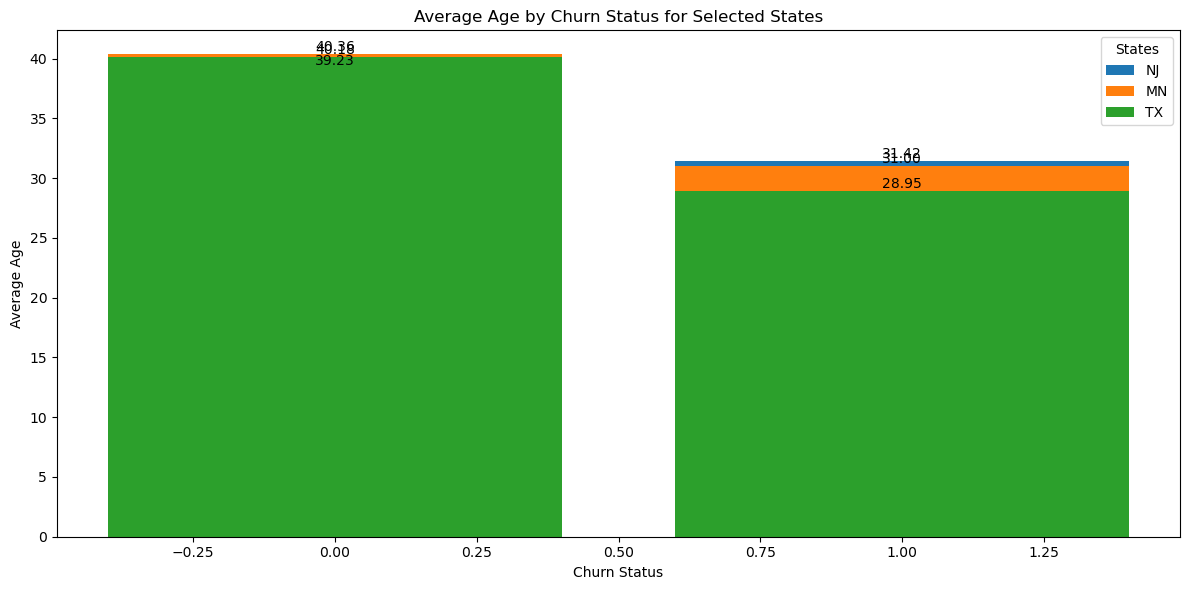

In [26]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each state's data as a bar
for state in filtered_pivot_table.columns:
    ax.bar(filtered_pivot_table.index, filtered_pivot_table[state], label=state)

# Customize the chart
ax.set_xlabel('Churn Status')
ax.set_ylabel('Average Age')
ax.set_title('Average Age by Churn Status for Selected States')
ax.legend(title='States')

# Add value labels on top of each bar
for i, state in enumerate(filtered_pivot_table.columns):
    for j, value in enumerate(filtered_pivot_table[state]):
        ax.text(j, value, f'{value:.2f}', ha='center', va='bottom' if value > 0 else 'top')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

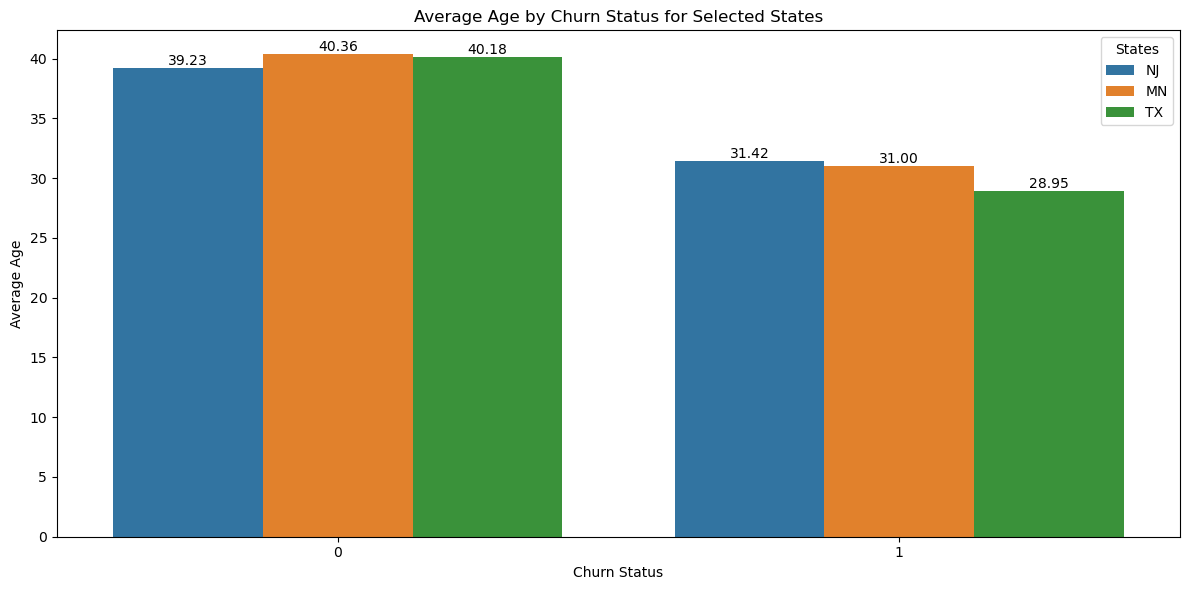

In [28]:
# Melt the pivot table to long format for easier plotting with seaborn
melted_pivot = filtered_pivot_table.reset_index().melt('churn', var_name='state', value_name='average_age')

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='churn', y='average_age', hue='state', data=melted_pivot)

# Customize the plot
plt.title('Average Age by Churn Status for Selected States')
plt.xlabel('Churn Status')
plt.ylabel('Average Age')

# Add value labels on top of each bar
for i, bar in enumerate(plt.gca().containers):
    plt.gca().bar_label(bar, fmt='%.2f', label_type='edge')

# Show legend
plt.legend(title='States')

# Display the plot
plt.tight_layout()
plt.show()

In [30]:
pivot_age_churn = pd.pivot_table(telcom_data_df, 
                                 values=['age'], 
                                 index=['churn'], 
                                 aggfunc={'age': 'mean'})

print(pivot_age_churn)

             age
churn           
0      39.993154
1      30.086957


<Figure size 1000x600 with 0 Axes>

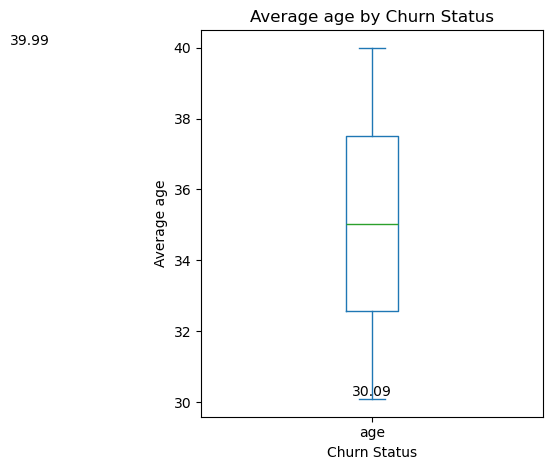

In [32]:
# Create the plot
plt.figure(figsize=(10, 6))
pivot_age_churn.plot(kind='box')

# Customize the plot
plt.title('Average age by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Average age')

# Add value labels on top of each bar
for i, v in enumerate(pivot_age_churn['age']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom' if v > 0 else 'top')

# Display the plot
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

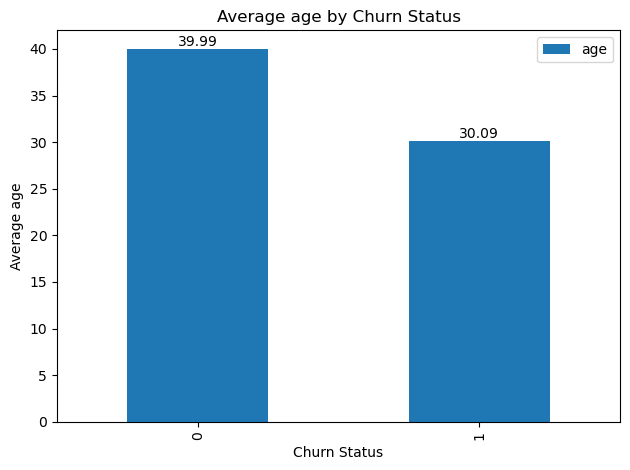

In [34]:
# Create the plot
plt.figure(figsize=(10, 6))
pivot_age_churn.plot(kind='bar')

# Customize the plot
plt.title('Average age by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Average age')

# Add value labels on top of each bar
for i, v in enumerate(pivot_age_churn['age']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom' if v > 0 else 'top')

# Display the plot
plt.tight_layout()
plt.show()

In [36]:
pivot_charge_churn = pd.pivot_table(telcom_data_df, 
                                 values=['total_day_charge'], 
                                 index=['churn'], 
                                 aggfunc={'total_day_charge': 'mean'})

print(pivot_age_churn)

             age
churn           
0      39.993154
1      30.086957


<Figure size 1000x600 with 0 Axes>

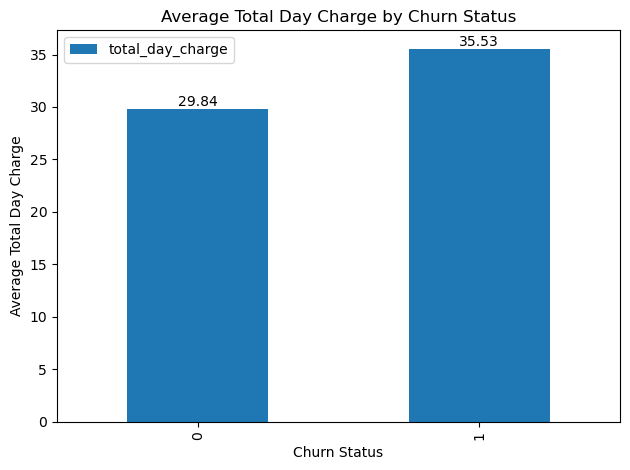

In [38]:
# Create the plot
plt.figure(figsize=(10, 6))
pivot_charge_churn.plot(kind='bar')

# Customize the plot
plt.title('Average Total Day Charge by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Average Total Day Charge')

# Add value labels on top of each bar
for i, v in enumerate(pivot_charge_churn['total_day_charge']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom' if v > 0 else 'top')

# Display the plot
plt.tight_layout()
plt.show()

In [40]:
pivot_number_vmail_messages_churn = pd.pivot_table(telcom_data_df, 
                                 values=['number_vmail_messages'], 
                                 index=['churn'], 
                                 aggfunc={'number_vmail_messages': 'mean'})

print(pivot_number_vmail_messages_churn)

       number_vmail_messages
churn                       
0                   8.177437
1                   4.299331


<Figure size 1000x600 with 0 Axes>

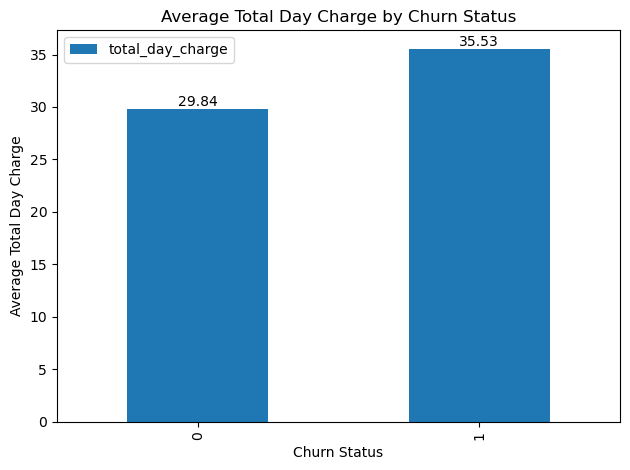

In [42]:
# Create the plot
plt.figure(figsize=(10, 6))
pivot_charge_churn.plot(kind='bar')

# Customize the plot
plt.title('Average Total Day Charge by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Average Total Day Charge')

# Add value labels on top of each bar
for i, v in enumerate(pivot_charge_churn['total_day_charge']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom' if v > 0 else 'top')

# Display the plot
plt.tight_layout()
plt.show()

In [44]:
# Create the plot
plt.figure(figsize=(10, 6))
pivot_total_minutes_churn.plot(kind='bar')

# Customize the plot
plt.title('Average Total Day Minutes by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Average Total Day Minutes')

# Add value labels on top of each bar
for i, v in enumerate(pivot_total_minutes_churn['total_day_minutes']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom' if v > 0 else 'top')

# Display the plot
plt.tight_layout()
plt.show()

NameError: name 'pivot_total_minutes_churn' is not defined

<Figure size 1000x600 with 0 Axes>

In [46]:
pivot_total_minutes_churn = pd.pivot_table(telcom_data_df, 
                                 values=['total_day_minutes'], 
                                 index=['churn'], 
                                 aggfunc={'total_day_minutes': 'mean'})

print(pivot_total_minutes_churn)

       total_day_minutes
churn                   
0             175.555093
1             208.990134


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Convert data to DataFrame
df = telcom_data_df
# Features (X) and target (y)
X = df[['age', 'total_day_charge']]
y = df['churn']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Initialize Logistic Regression model
model = LogisticRegression()
# Fit the model to the training data
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

In [52]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 94.00%
Confusion Matrix:
[[707  14]
 [ 37  92]]


In [54]:
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(y_test, y_pred)
# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       721
           1       0.87      0.71      0.78       129

    accuracy                           0.94       850
   macro avg       0.91      0.85      0.87       850
weighted avg       0.94      0.94      0.94       850



C:\Users\lerch\AppData\Local\Temp\ipykernel_222292\230809614.py:6: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  sc_pred = plt.scatter(X_test['age'], X_test['total_day_charge'], c=y_pred, marker='x', label='Predicted', edgecolor='r')


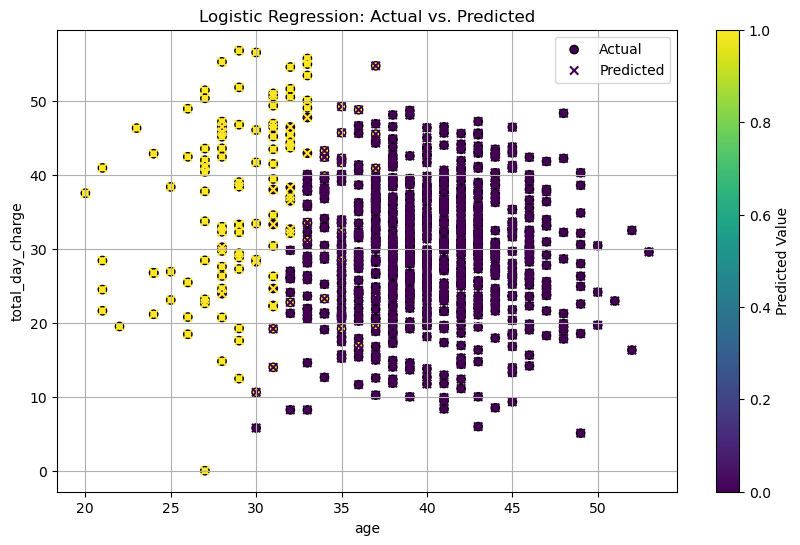

In [56]:
# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
# Scatter plot for actual values
sc_actual = plt.scatter(X_test['age'], X_test['total_day_charge'], c=y_test, marker='o', label='Actual', edgecolor='k')
# Scatter plot for predicted values
sc_pred = plt.scatter(X_test['age'], X_test['total_day_charge'], c=y_pred, marker='x', label='Predicted', edgecolor='r')
# Adding the plot details
plt.title('Logistic Regression: Actual vs. Predicted')
plt.xlabel('age')
plt.ylabel('total_day_charge')
plt.legend()
plt.grid(True)
plt.colorbar(sc_pred, label='Predicted Value')
# plt.colorbar(sc_actual, label='Actual Value')
plt.show()

In [58]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
evaluation(y_test, y_pred, LR, 'LogisticRegression()')

NameError: name 'evaluation' is not defined

In [60]:
import re

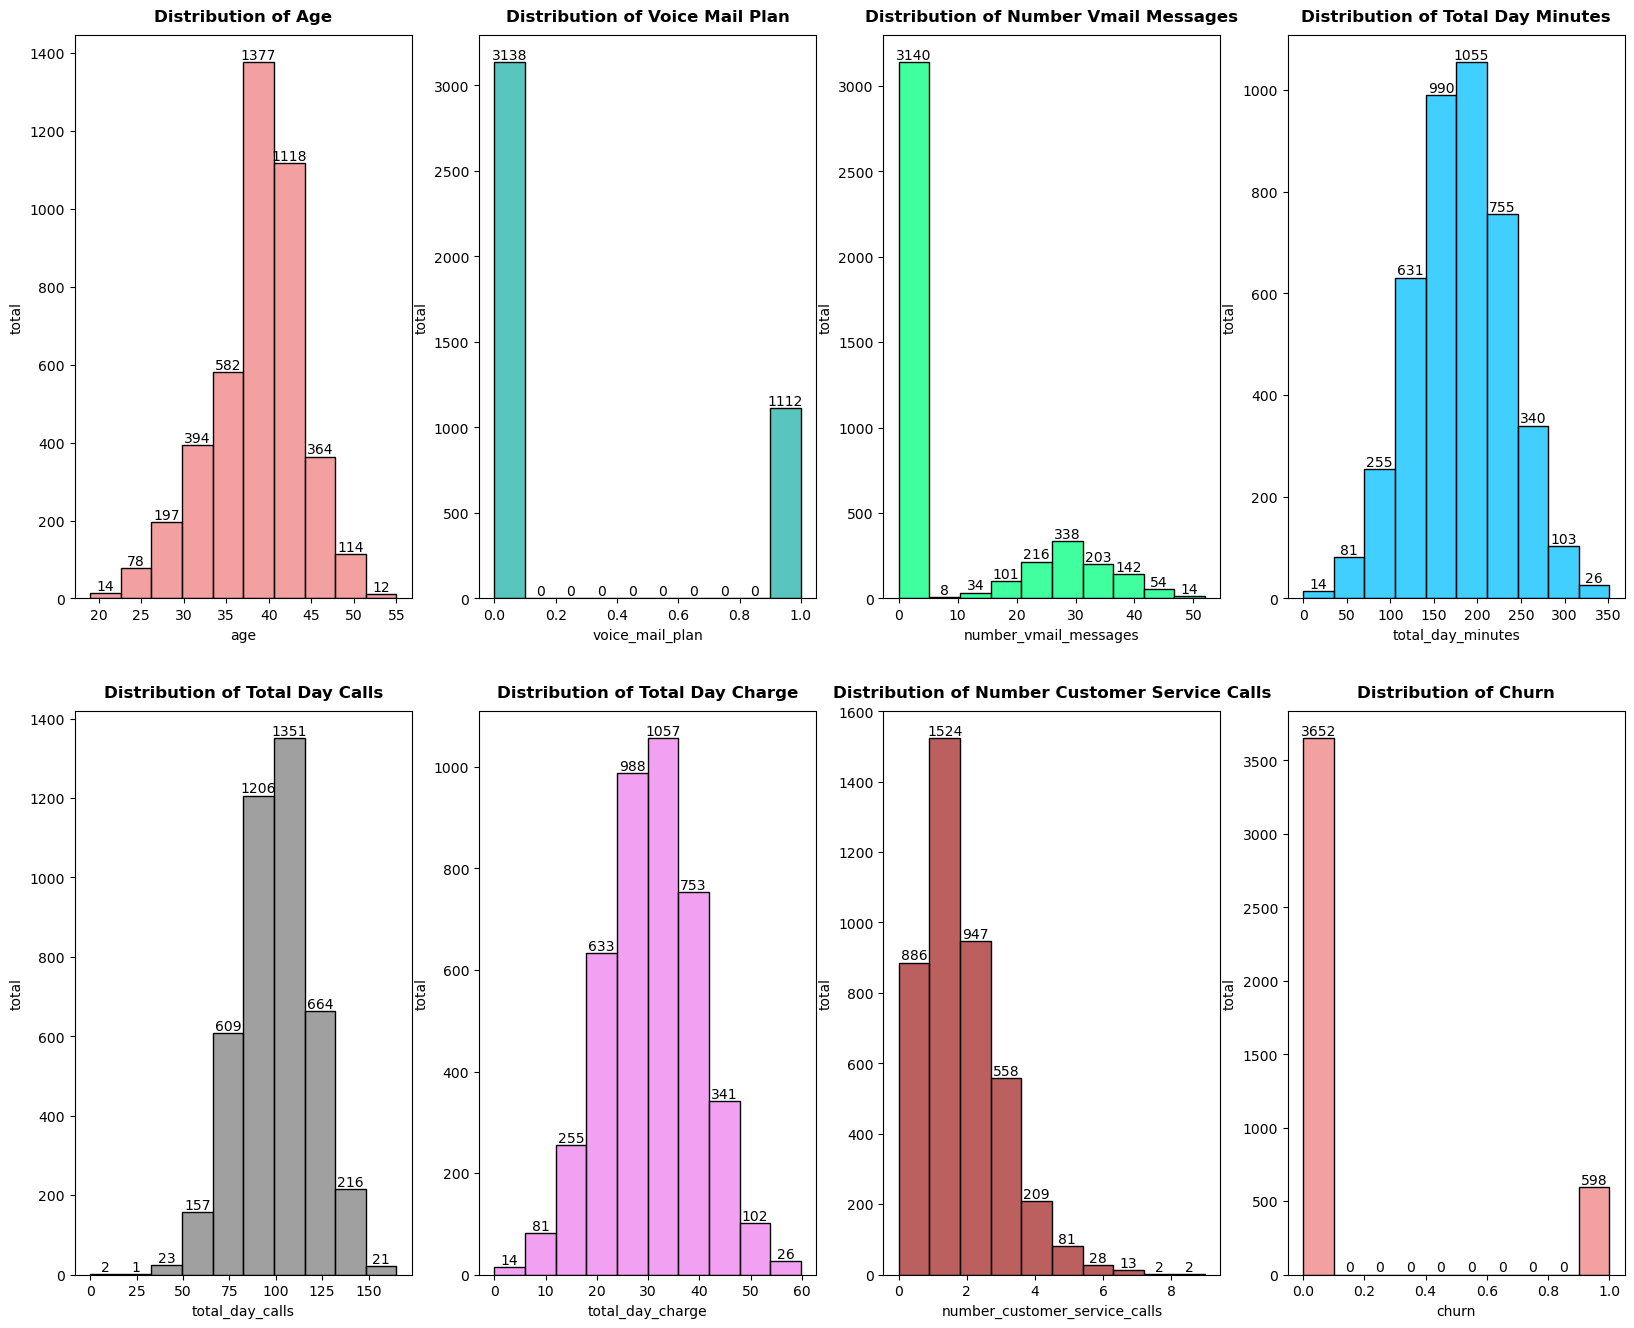

In [62]:
num_column = df.describe().columns.values
fig = plt.figure(figsize=[20,60])
for i ,col in enumerate(num_column):
    ax = fig.add_subplot(7, 4, i+1)
    ax = sns.histplot(df[col], bins=10, color=color_list[i])
    ax.bar_label(ax.containers[0], fontsize=10)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('total', fontsize=10)
    ax.tick_params(labelsize=10)
    title = re.sub('_', ' ', col.title())
    ax.set_title('Distribution of {}'.format(title), fontweight='bold', fontsize=12, pad=10)

C:\Users\lerch\AppData\Local\Temp\ipykernel_222292\876837770.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  ax = sns.kdeplot(data = df, x=col, hue='churn',  palette=['teal', 'indianred'])


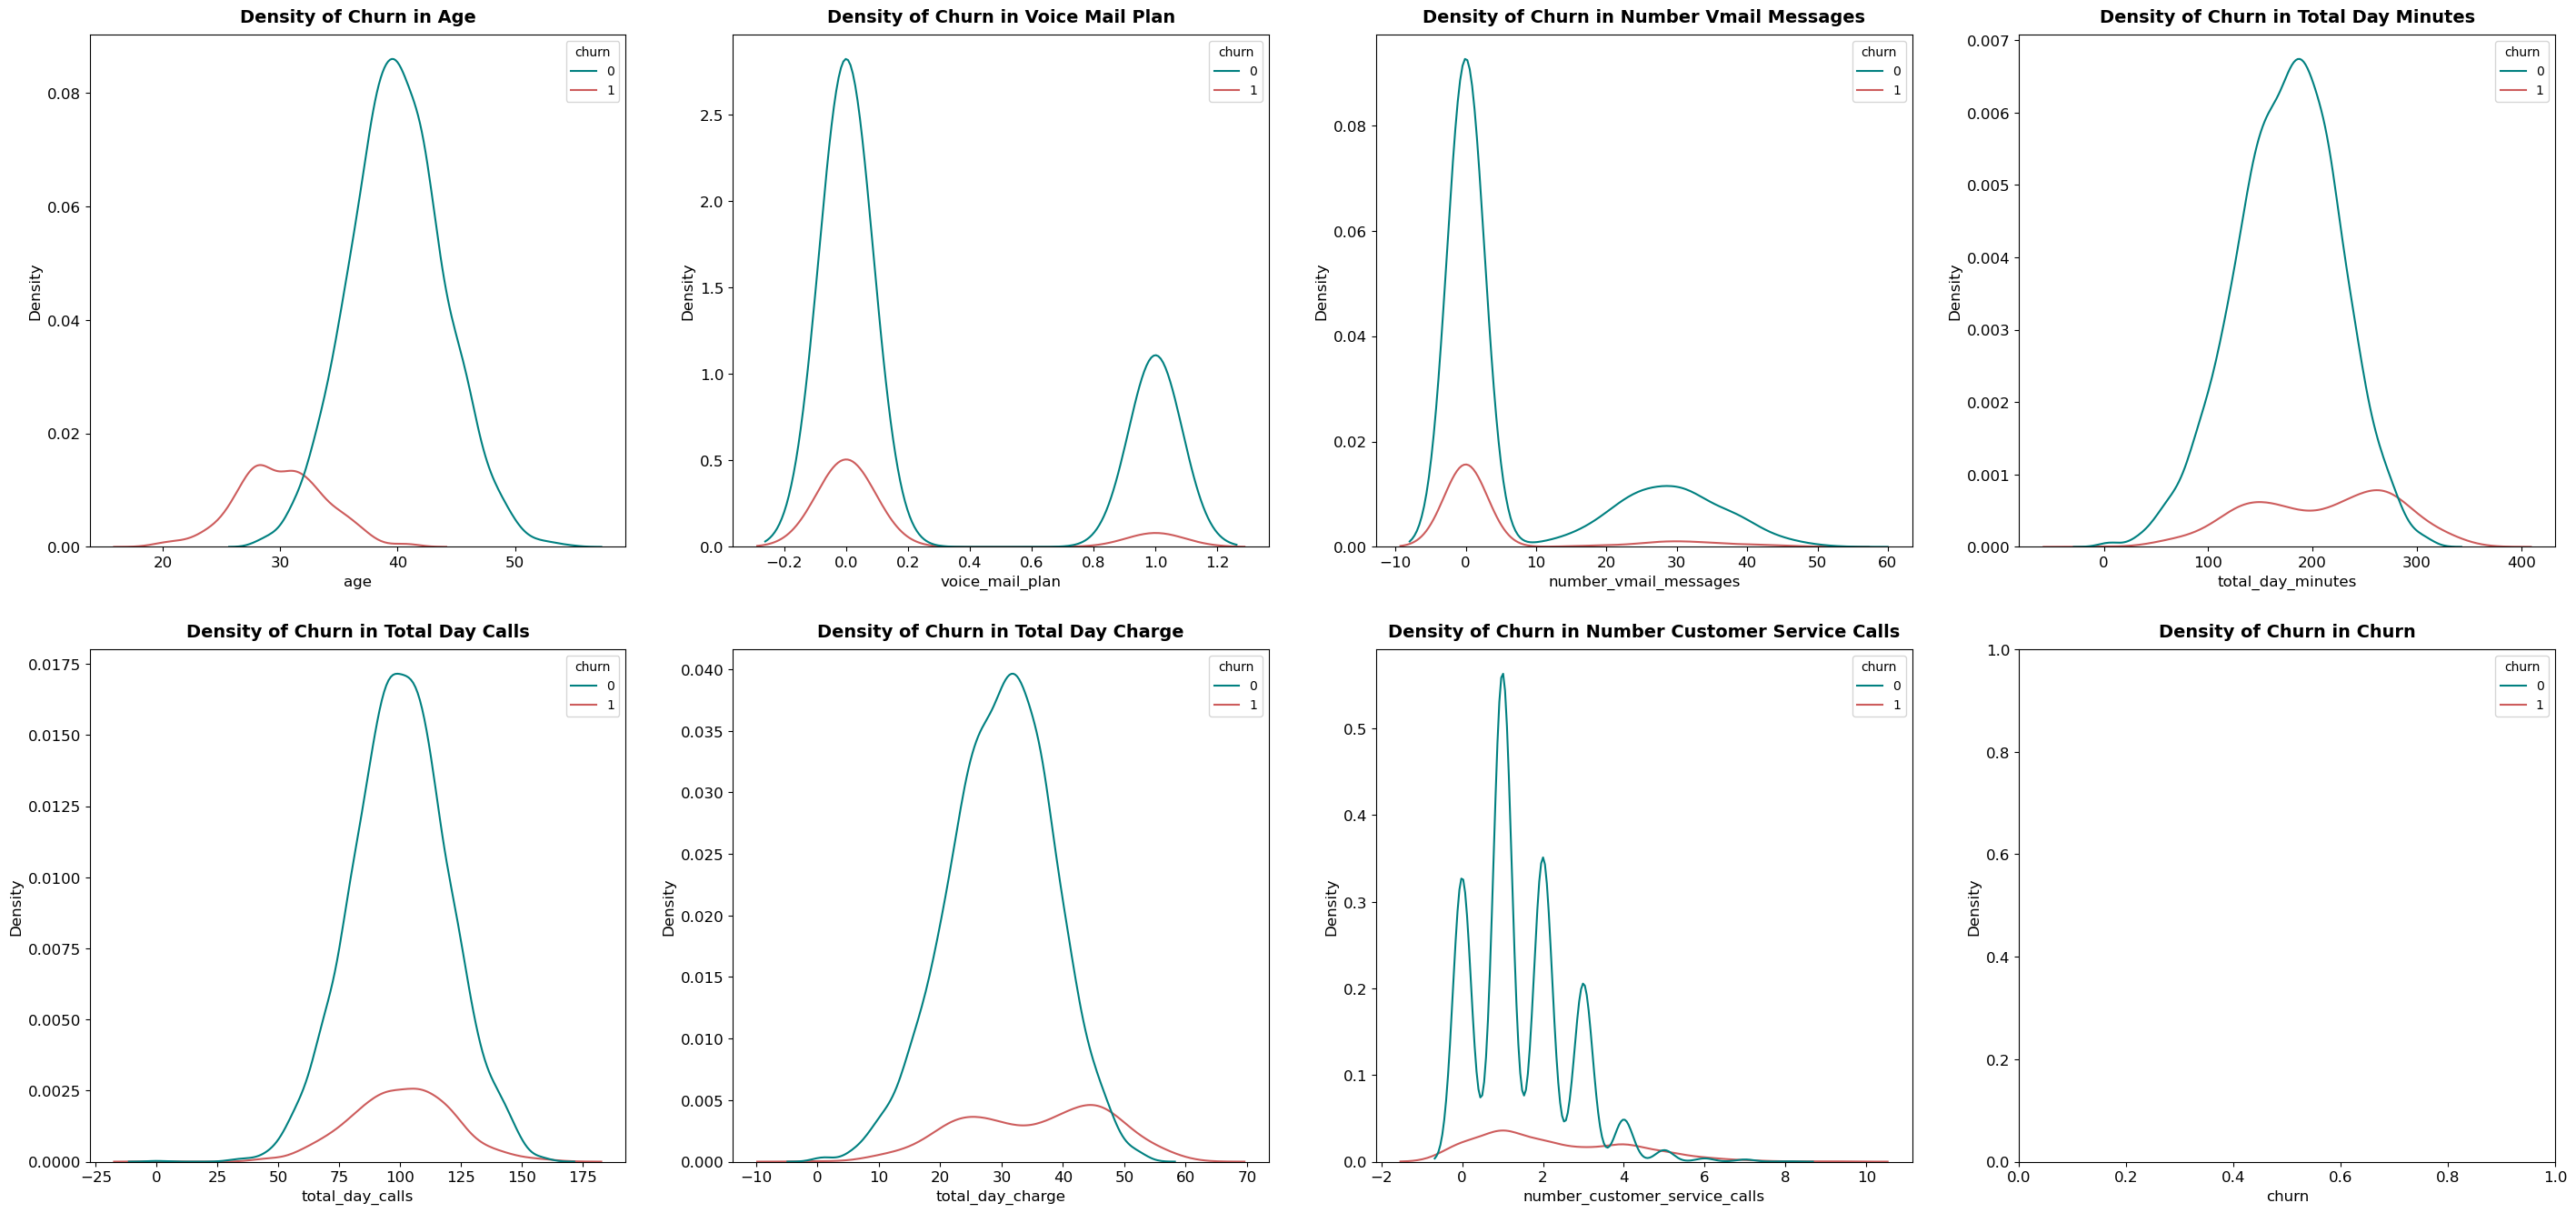

In [63]:
fig = plt.figure(figsize=[35,60])
for i ,col in enumerate(num_column):
    ax = fig.add_subplot(7, 4, i+1)
    ax = sns.kdeplot(data = df, x=col, hue='churn',  palette=['teal', 'indianred'])
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    ax.tick_params(labelsize=12)
    title = re.sub('_', ' ', col.title())
    ax.set_title('Density of Churn in {}'.format(title), fontweight='bold', fontsize=14, pad=10)

In [64]:
telcom_data_df.head()

,state,age,area_code,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,number_customer_service_calls,churn
0,OH,42,415,1,26,161.6,123,27.47,1,0
1,NJ,36,415,0,0,243.4,114,41.38,0,0
2,OH,39,408,0,0,299.4,71,50.90,2,0
3,OK,41,415,0,0,166.7,113,28.34,3,0
4,MA,34,510,1,24,218.2,88,37.09,3,0


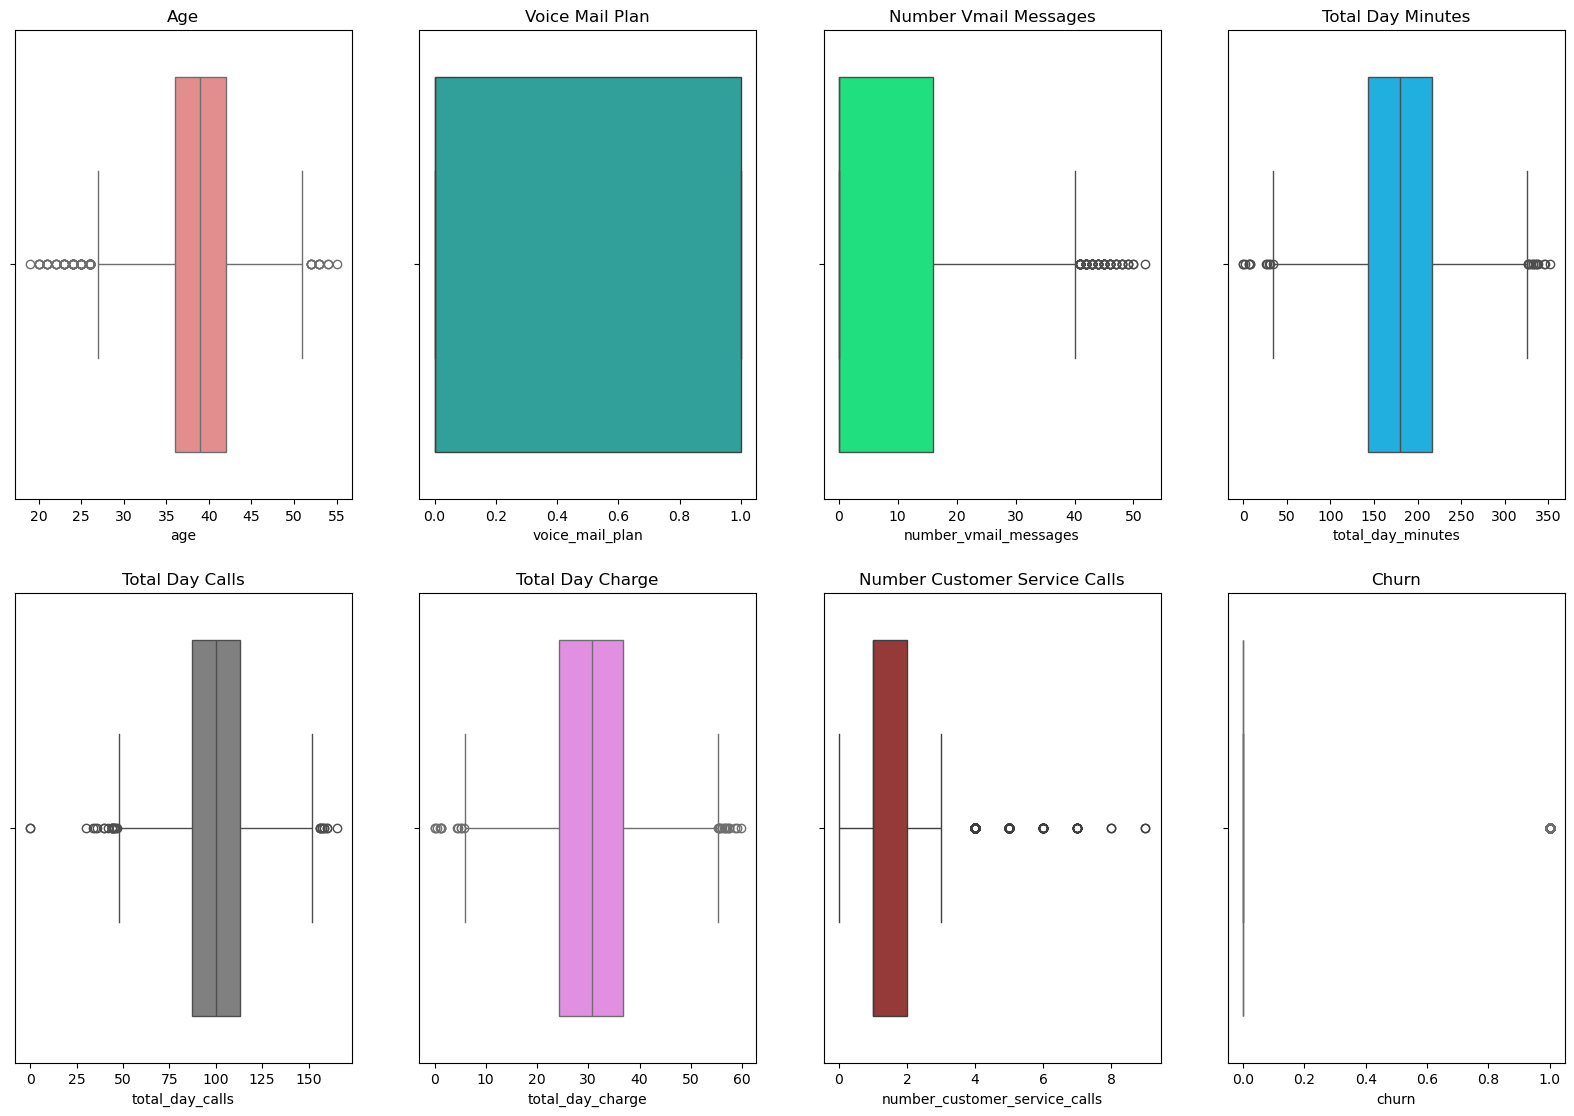

In [66]:
colour = ['lightcoral','lightseagreen', 'springgreen', 'deepskyblue', 'gray', 'violet', 'brown', 'lightcoral', 'deeppink', 'peru',
          'purple', 'cyan', 'forestgreen', 'crimson', 'magenta']
fig = plt.figure(figsize=[20,50])
for i ,col in enumerate(num_column):
    ax = fig.add_subplot(7,4, i+1)
    ax = sns.boxplot(data = df, x=col, color=color_list[i])
    title = re.sub('_', ' ', col.title())
    ax.set_title(title)
    ax.set_xlabel(col)

In [67]:
exclude_column = ['state', 'area_code', 'churn_rate_per_state']

In [70]:
churn_corr = df.drop(columns=exclude_column).corr()['churn'].sort_values(ascending=False)[1:].reset_index().rename(columns={'index':'variable', 'churn':'correlation'})
churn_corr['color'] = ['positive' if value > 0 else 'negative' for value in churn_corr['correlation']]
palette = {'positive':'indianred', 'negative':'teal'}

plt.figure(figsize=(30,15))
ax = sns.barplot(data=churn_corr, y='variable', x='correlation', hue='color', palette=palette, dodge=False)
ax.bar_label(ax.containers[0], fontsize=20, fmt='%.3f')
ax.bar_label(ax.containers[1], fontsize=20, fmt='%.3f')
ax.set_xlabel('Correlations')
ax.set_ylabel('Columns (variables)')
ax.set_title('Correlation Churn with All Columns (variable)', fontweight='bold', fontsize=30, pad=20)
plt.legend()
plt.show()

KeyError: "['churn_rate_per_state'] not found in axis"

In [72]:
from matplotlib.colors import LinearSegmentedColormap
colors = [(0, 'teal'), (0.5, 'white'), (1, 'indianred')]
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)
plt.figure(figsize=(20,10))
ax = sns.heatmap(df.drop(columns=exclude_column).corr(), annot=True, cmap=cmap, vmin=-1, vmax=1)
ax.set_title('Correlation Heatmap', fontdict={'fontsize':40}, pad=30)
plt.show()

KeyError: "['churn_rate_per_state'] not found in axis"

<Figure size 2000x1000 with 0 Axes>